# Analyze Results from Evaluation Quickstart

This notebook analyzes the results of the evaluation quickstart.

## Setup

First, we need to import our libraries:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [3]:
results = pd.read_csv('build/eval-results.csv')
results.head()

,DataSet,Partition,Algorithm,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MAP,Precision,Recall,F1
0,crossfold,4,Popular,Y,0.270,0.499,0,0,0,NaN,NaN,NaN,20.000000,0.038968,0.017647,0.046136,0.025529
1,crossfold,5,Popular,Y,0.253,0.504,0,0,0,NaN,NaN,NaN,20.000000,0.022203,0.011765,0.043583,0.018528
2,crossfold,5,ItemItem,Y,2.713,1.191,34,330,88,0.266667,3.116176,3.849358,19.411765,0.078721,0.016176,0.030138,0.021053
3,crossfold,4,ItemItem,Y,2.274,0.667,34,500,162,0.324000,2.629579,6.906085,18.235294,0.039920,0.010294,0.039010,0.016290
4,crossfold,3,Popular,Y,0.028,0.180,0,0,0,NaN,NaN,NaN,20.000000,0.022636,0.011429,0.065887,0.019478


In [4]:
results

,DataSet,Partition,Algorithm,Succeeded,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MAP,Precision,Recall,F1
0,crossfold,4,Popular,Y,0.202,0.375,0,0,0,NaN,NaN,NaN,20.000000,0.073360,0.016176,0.053832,0.024877
1,crossfold,5,Popular,Y,0.200,0.420,0,0,0,NaN,NaN,NaN,20.000000,0.080760,0.020588,0.056476,0.030176
2,crossfold,3,Popular,Y,0.056,0.317,0,0,0,NaN,NaN,NaN,20.000000,0.050623,0.014286,0.061500,0.023186
3,crossfold,5,ItemItem,Y,0.564,0.705,34,392,62,0.158163,0.000000,0.000000,14.205882,0.072572,0.011842,0.031383,0.017196
4,crossfold,4,ItemItem,Y,0.623,0.867,34,377,47,0.124668,0.000000,0.000000,13.735294,0.127925,0.010294,0.020810,0.013774
5,crossfold,2,Popular,Y,0.072,0.077,0,0,0,NaN,NaN,NaN,20.000000,0.009308,0.007143,0.011448,0.008797
6,crossfold,1,ItemItem,Y,0.560,1.155,35,579,56,0.096718,0.000000,0.000000,14.828571,0.030485,0.008571,0.022854,0.012467
7,crossfold,1,Popular,Y,0.039,0.099,0,0,0,NaN,NaN,NaN,20.000000,0.041468,0.014286,0.060142,0.023087
8,crossfold,2,ItemItem,Y,0.215,0.417,35,359,19,0.052925,0.000000,0.000000,14.200000,0.036962,0.018571,0.009158,0.012266
9,crossfold,3,ItemItem,Y,0.221,0.581,35,287,27,0.094077,0.000000,0.000000,13.057143,0.047276,0.004286,0.009740,0.005952


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [5]:
agg_results = results.drop(['Partition'], axis=1).groupby(['Algorithm','lambda','Beta']).mean()
agg_results

KeyError: 'lambda'

In [4]:
agg_results = results.drop(['Partition'], axis=1).groupby(['Algorithm']).mean()
agg_results

,BuildTime,TestTime,NUsers,NAttempted,NGood,Coverage,RMSE.ByUser,RMSE.ByRating,TopN.ActualLength,MAP,Precision,Recall,F1
Algorithm,,,,,,,,,,,,,
ItemItem,3.1064,0.7982,34.6,398.8,108.0,0.266290,2.990968,5.629945,19.186555,0.075484,0.013866,0.041008,0.020488
PF,355.6122,0.1112,34.6,398.8,135.6,0.337602,2.691387,3.539105,20.000000,0.006983,0.003218,0.004034,0.003406
Popular,0.1198,0.2758,0.0,0.0,0.0,NaN,NaN,NaN,20.000000,0.044752,0.013311,0.049819,0.020662
funkSVD,13.7204,0.3802,34.6,398.8,135.6,0.337602,2.380110,3.346752,20.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
res_slim = results.loc[results['lambda'].notnull(), :]

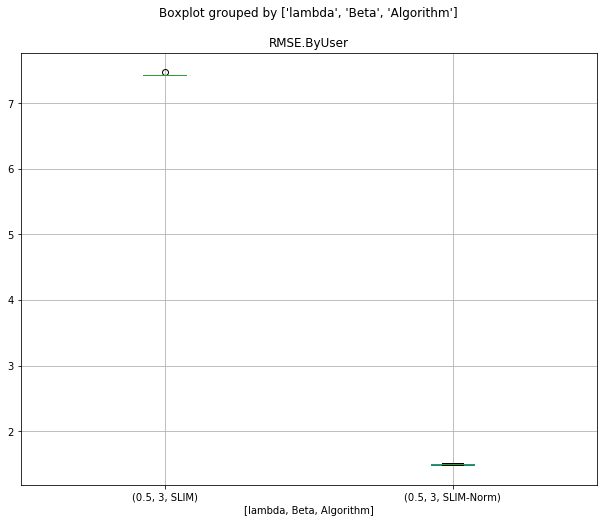

In [8]:
res_slim.boxplot(['RMSE.ByUser'], ['lambda','Beta','Algorithm'], figsize=(10, 8))

## Plotting Results

Let's start plotting things. What's the RMSE achieved by each algorithm?

In [9]:
df = results.loc[results['lambda'].notnull(),['lambda', 'RMSE.ByUser']].groupby('lambda').mean()
# df.plot.scatter(x=df['lambda'], y=df['RMSE.ByUser'])

/home/mtian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.5, right=0.5
  'left=%s, right=%s') % (left, right))


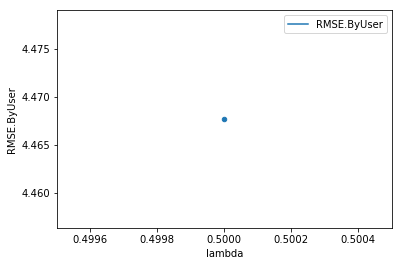

In [10]:
ax = df.reset_index().plot.scatter(y='RMSE.ByUser', x='lambda')
df.plot(ax=ax)

Next up: nDCG

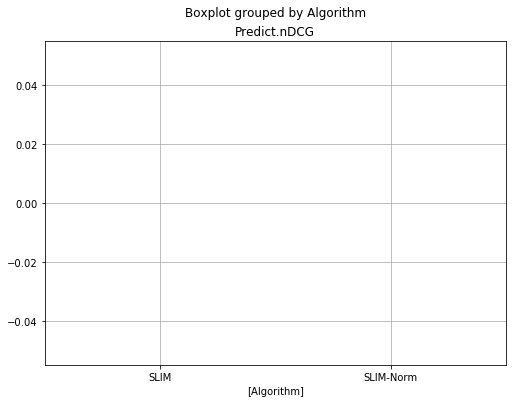

In [11]:
results.loc[:,['Algorithm', 'Predict.nDCG']].boxplot(by='Algorithm', figsize=(8,6))

Finally, the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7355b0dd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fc731f45e48>], dtype=object)

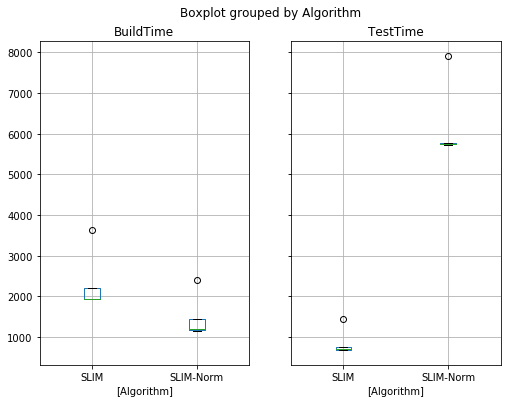

In [12]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm', figsize=(8,6))

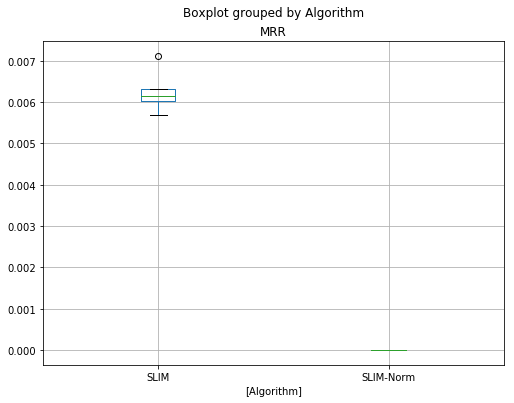

In [13]:
results.loc[:,['Algorithm', 'MRR']].boxplot(by='Algorithm', figsize=(8,6))

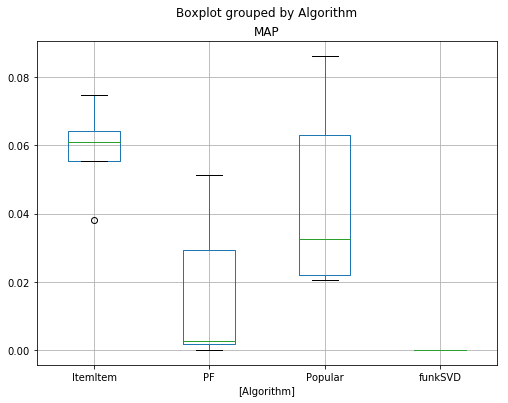

In [5]:
results.loc[:,['Algorithm', 'MAP']].boxplot(by='Algorithm', figsize=(8,6))

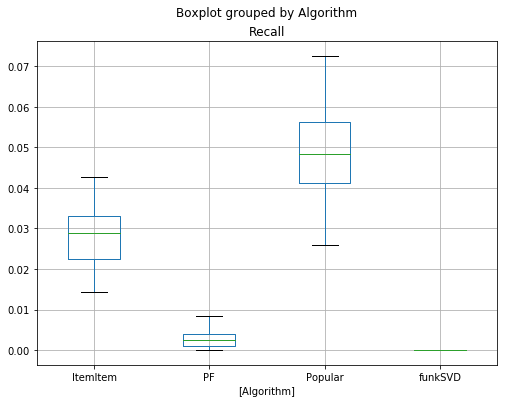

In [6]:
results.loc[:,['Algorithm', 'Recall']].boxplot(by='Algorithm', figsize=(8,6))

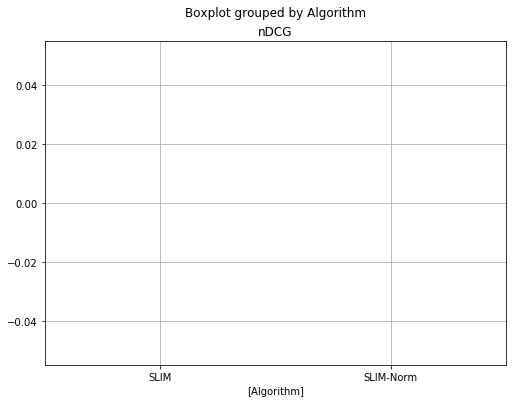

In [15]:
results.loc[:,['Algorithm', 'nDCG']].boxplot(by='Algorithm', figsize=(8,6))